# **Travel Insurance Buying Prediction**

### Dự án dự đoán các khách hàng mua bảo hiểm du lịch

*Language used: English*

*Author: Hoang Anh Tuan*

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

## **Data Import and Initial View**

In [3]:
# Importing Data
link = 'https://drive.google.com/file/d/13QRsF4FOBCoGvITgzicQYX1Ffum4LFS3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
ins_df = pd.read_csv(path)

In [4]:
# Initial View
ins_df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,No,No,0.0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,No,No,0.0
2,2,34,Private Sector/Self Employed,1,500000,4,1,N,N,1.0
3,3,28,Private Sector/Self Employed,1,700000,3,1,No,No,0.0
4,4,Unknown,Private Sector/Self Employed,Yes,700000,8,1,Y,N,0.0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1.0
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0.0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0.0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1.0


Number of rows: 1987

Number of columns: 10

  1. **Unnamed: 0** (Redundant)
  2. **Age** - Age of customer
  3. **Employment Type** - Type of employment for each customer
  4. **GraduateOrNot** - Is the customer graduated?
  5. **AnnualIncome** - Money a customer makes annually
  6. **FamilyMembers** - How many family members does each customer have
  7. **ChronicDiseases** - Does the customer has a chronic disease (Yes/No)
  8. **FrequentFlyer** - Does the customer fly frequently (Yes/No)
  9. **EverTravelledAbroad** - Have the customer ever travel abroad (Yes/No)
  10.	**TravelInsurance** *Target class* - does the customer buy the travel insurance? (Yes/No)

**At the first glance, we can clearly see that the data is really messed up, and almost all columns contain faulty values even when the dataset only show 5 first and 5 last rows.**

## **Data Cleaning**

###Show dataset's information

In [6]:
# Data information
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1987 non-null   int64  
 1   Age                  1971 non-null   object 
 2   Employment Type      1960 non-null   object 
 3   GraduateOrNot        1987 non-null   object 
 4   AnnualIncome         1987 non-null   object 
 5   FamilyMembers        1987 non-null   int64  
 6   ChronicDiseases      1987 non-null   int64  
 7   FrequentFlyer        1987 non-null   object 
 8   EverTravelledAbroad  1987 non-null   object 
 9   TravelInsurance      1871 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 155.4+ KB


**We can clear see that not all columns have the correct columns, this is due to the faulty rows from each columns, so I will have to clean the data then change the data type at the end of this part.**

In [8]:
# Data Description
ins_df.describe()

,Unnamed: 0,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1871.000000
mean,993.000000,4.752894,0.277806,0.359701
std,573.741812,1.609650,0.448030,0.480041
min,0.000000,2.000000,0.000000,0.000000
25%,496.500000,4.000000,0.000000,0.000000
50%,993.000000,5.000000,0.000000,0.000000
75%,1489.500000,6.000000,1.000000,1.000000
max,1986.000000,9.000000,1.000000,1.000000


In [9]:
# NULL
ins_df.isnull().sum()

Unnamed: 0               0
Age                     16
Employment Type         27
GraduateOrNot            0
AnnualIncome             0
FamilyMembers            0
ChronicDiseases          0
FrequentFlyer            0
EverTravelledAbroad      0
TravelInsurance        116
dtype: int64

**There are Nulls on 3 columns "Age", "Employment Type" and "TravelInsurance"**

In [10]:
# Delete the redundant column
ins_df = ins_df.drop('Unnamed: 0', axis=1)

In [12]:
# Check duplication
duplicates = ins_df.duplicated(subset=None, keep='first')
duplicates_count = duplicates.sum()
print(f"Count of duplications in the dataset: {duplicates_count}")

Count of duplications in the dataset: 630


**The dataset contains 630 duplications, but I will deal with it later if there is a problem since there are no Primary Key in this dataset**

### Preprocessing: Column "Age"

In [15]:
# Current type
ins_df['Age'].dtype

dtype('O')

**The current type of this column is "Object", but it supposed to be "Int"**

In [17]:
# See unique
ins_df['Age'].unique()

array(['31', '34', '28', 'Unknown', '25', nan, '33', '26', '29', '30',
       '32', '35', '27'], dtype=object)

**The columns contain "Unknown" and NULL, that is the problem**

In [29]:
# Split Number and Unknown

# Numberic Age
number_ins_df = ins_df[~(ins_df['Age'] == 'Unknown') &  ~(pd.isna(ins_df['Age']))]
# Unknown Age
unknown_ins_df = ins_df[(ins_df['Age'] == 'Unknown') | (pd.isna(ins_df['Age']))]

array(['31', '34', '28', '25', '33', '26', '29', '30', '32', '35', '27'],
      dtype=object)

In [37]:
# Change data type
number_ins_df['Age'] = number_ins_df['Age'].astype(int)

# Unique of Numeric Age
number_ins_df['Age'].unique()

<ipython-input-37-216fecdc2597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number_ins_df['Age'] = number_ins_df['Age'].astype(int)


array([31, 34, 28, 25, 33, 26, 29, 30, 32, 35, 27])

In [32]:
# Unknown and NULL
unknown_ins_df['Age'].unique()

array(['Unknown', nan], dtype=object)

Text(0.5, 1.0, 'Distribution of Age')

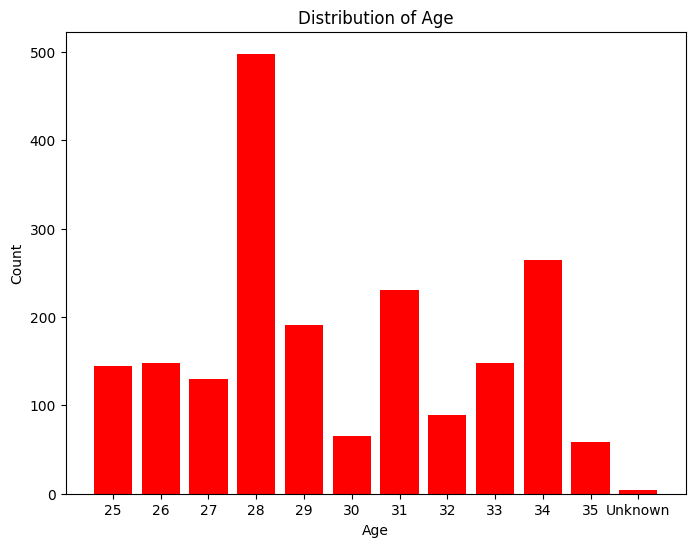

In [41]:
# Count the unique values in the "age" column
age_counts = ins_df['Age'].value_counts()

# Sort the age counts by age value
age_counts = age_counts.sort_index()

# Create a bar chart to visualize the count of each age
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values, color='r')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

**The values for age seems to be random and not be in any order, but the age of 28 is a bit more common than all of them**

**All faulty values will be replaced with average of 25 to 35**

In [48]:
# Function to replace missing values and "Unknown" with random numbers
def replace_missing_with_random(value):
    if pd.isna(value) or value == 'Unknown':
        return np.random.randint(25, 36)  # Generate a random integer between 25 and 35
    else:
        return value

In [46]:
# Apply the function to the 'Age' column
ins_df['Age'] = ins_df['Age'].apply(replace_missing_with_random)

In [47]:
# Change to correct type
ins_df['Age'] = ins_df['Age'].astype(int)

In [49]:
# Final Unique check
ins_df['Age'].unique()

array([31, 34, 28, 33, 25, 27, 26, 29, 30, 32, 35])

***Age*** is cleaned

### Preprocessing: Column "Employment Type"

In [50]:
# See unique
ins_df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed', nan],
      dtype=object)

**The column contains NULL value**

Text(0.5, 1.0, 'Distribution of Employment Type')

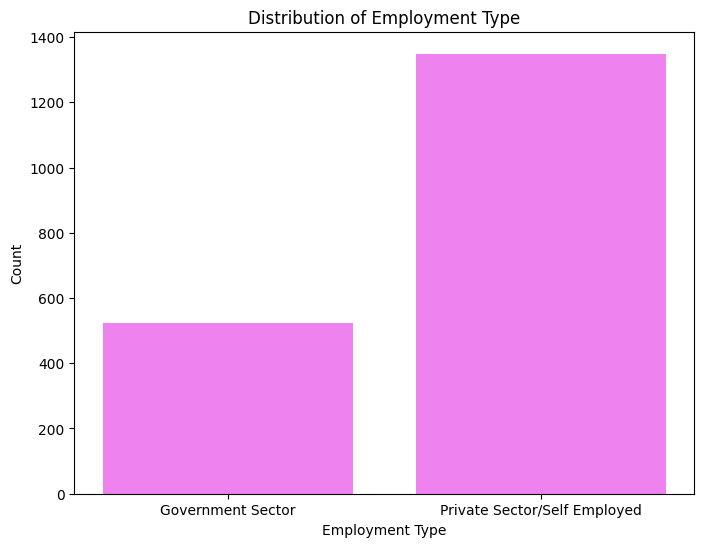

In [158]:
# Use a plot to see the distribution

# Count the unique values in the "Employment Type" column
empl_counts = ins_df['Employment Type'].value_counts()

# Sort the age counts by age value
empl_counts = empl_counts.sort_index()

# Create a bar chart to visualize the count of each age
plt.figure(figsize=(8, 6))
plt.bar(empl_counts.index, empl_counts.values, color='violet')

# Add labels and a title
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Distribution of Employment Type')

**"Private Sector/Self Emplyed" dominates the distribution for this column, so I will replace all NULL value with this value if there is not too many NULLs**

In [54]:
# Count to see if there is too many NULL
ins_df['Employment Type'].isnull().sum()

27

In [55]:
# Replace all NULL with "Private Sector/Self Employed"
ins_df['Employment Type'] = ins_df['Employment Type'].fillna("Private Sector/Self Employed")

***Employment Type*** is cleaned

### Preprocessing: Column "GraduateOrNot"

In [57]:
# See unique
ins_df['GraduateOrNot'].unique()

array(['1', 'Yes', 'No', '0'], dtype=object)

**The unique values contain ['1', 'Yes', 'No', '0'], I will assume that "Yes" is same as 1 and "No" is same as 0**

In [63]:
# Use replace to change 1 back to Yes and 0 back to No
ins_df['GraduateOrNot'] = ins_df['GraduateOrNot'].replace({'0': 'No', '1': 'Yes'})

In [64]:
ins_df['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

***GraduateOrNot*** is cleaned

Text(0.5, 1.0, 'Distribution of Graduation (Percentage)')

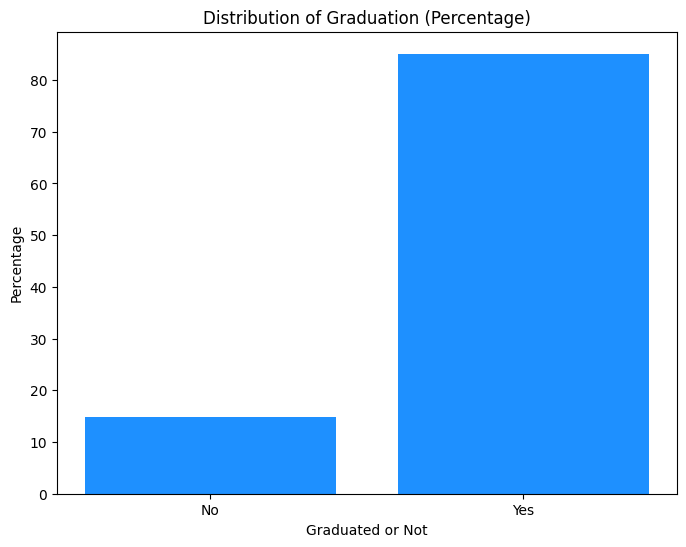

In [155]:
# Use a plot to see the distribution

# Count the unique values in the "GraduateOrNot" column
grad_counts = ins_df['GraduateOrNot'].value_counts()

# Sort the counts by category value
grad_counts = grad_counts.sort_index()

# Calculate the percentage of each category
grad_percentage = (grad_counts / grad_counts.sum()) * 100

# Define the order of bars and labels
bar_order = [0, 1]
bar_labels = ['No', 'Yes']

# Create a bar chart with the specified order
plt.figure(figsize=(8, 6))
plt.bar(bar_labels, grad_percentage, color='dodgerblue')

# Add labels and a title
plt.xlabel('Graduated or Not')
plt.ylabel('Percentage')
plt.title('Distribution of Graduation (Percentage)')

**The proportion for customer who graduated is approximately 85%, and the remaining is for the non-graduated customers**

### Preprocessing: Column "AnnualIncome"

In [70]:
# See unique
ins_df['AnnualIncome'].unique()

array(['400000', '1250000', '500000', '700000', '1150000', '1,300,000',
       '0', '1450000', '800000', '1400000', '850000', '1500000',
       '1050000', '350000', '1100000', '1300000', '600000', '550000',
       '300000', '750000', '800,000', '1200000', '1350000', '1000000',
       '950000', '1700000', '900000', '700,000', '1750000', '650000',
       '1,200,000', '600000000', '450000', '350,000', '750,000',
       '115,000,000', '156,000,000', '1800000', '8,888,888,000',
       '1550000', '1,400,000', '1650000'], dtype=object)

**The reason why this column is "Object" typed is because the values are not in the same form, some numeric values contain comma as delimiter for decimal such as '156,000,000', and all those must be changed**

In [72]:
# Delete ALL COMMA delimiter
ins_df['AnnualIncome'] = ins_df['AnnualIncome'].str.replace(',', '', regex=True)
ins_df['AnnualIncome'] = ins_df['AnnualIncome'].astype(int)

In [75]:
# Using IQR to handle outliers
# Calculate the 0.25 and 0.75 quantiles
q25 = ins_df['AnnualIncome'].quantile(0.25)
q75 = ins_df['AnnualIncome'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q75 - q25

# Define a lower and upper bound for outliers
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# Replace outliers with a predefined value (e.g., median)
median = ins_df['AnnualIncome'].median()
ins_df['AnnualIncome'] = ins_df['AnnualIncome'].apply(lambda x: x if lower_bound <= x <= upper_bound else median)

In [78]:
ins_df['AnnualIncome'].unique()

array([ 400000., 1250000.,  500000.,  700000., 1150000., 1300000.,
             0., 1450000.,  800000., 1400000.,  850000., 1500000.,
       1050000.,  350000., 1100000.,  600000.,  550000.,  300000.,
        750000., 1200000., 1350000., 1000000.,  950000., 1700000.,
        900000., 1750000.,  650000.,  450000., 1800000., 1550000.,
       1650000.])

**All the outliers are removed nicely, but some value 0 is still exist, and it must be replaced**

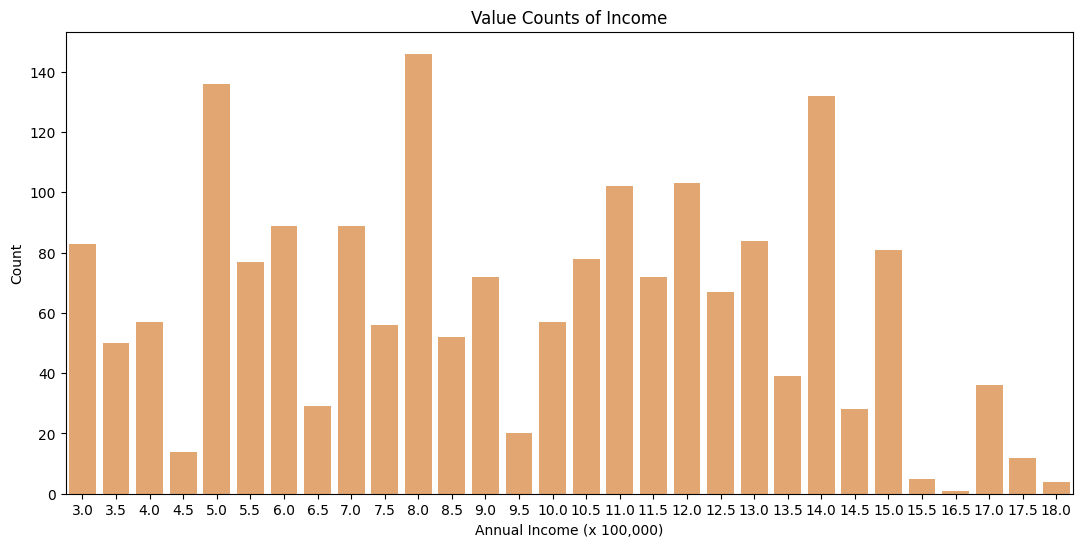

In [154]:
# Modify the values in the 'AnnualIncome' column to display in thousands
ins1000_df = ins_df.copy()
ins1000_df['AnnualIncome'] = ins_df['AnnualIncome'] / 100000

# Get value counts of the 'AnnualIncome' column
value_counts = ins1000_df['AnnualIncome'].value_counts()

# Create a bar chart for the value counts using Seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='sandybrown')
plt.xlabel('Annual Income (x 100,000)')
plt.ylabel('Count')
plt.title('Value Counts of Income')

plt.show()

**As we can see on the distribution chart, value 800000, 500000 and 1400000 are 3 most common values, so I will replace value 0 with 1 of them**

In [99]:
# Function to replace 0 with one of the three values
def replace_zero_with_random(values):
    if values == 0:
        return random.choice([500000, 800000, 1400000])
    return values

In [103]:
# Apply the function to the 'AnnualIncome' column
ins_df['AnnualIncome'] = ins_df['AnnualIncome'].apply(replace_zero_with_random)
ins_df['AnnualIncome'].unique()

array([ 400000., 1250000.,  500000.,  700000., 1150000., 1300000.,
        800000., 1450000., 1400000.,  850000., 1500000., 1050000.,
        350000., 1100000.,  600000.,  550000.,  300000.,  750000.,
       1200000., 1350000., 1000000.,  950000., 1700000.,  900000.,
       1750000.,  650000.,  450000., 1800000., 1550000., 1650000.])

***AnnualIncome*** is cleaned

### Preprocessing: Column "FamilyMembers"

In [104]:
# See unique
ins_df['FamilyMembers'].unique()

array([6, 7, 4, 3, 8, 9, 5, 2])

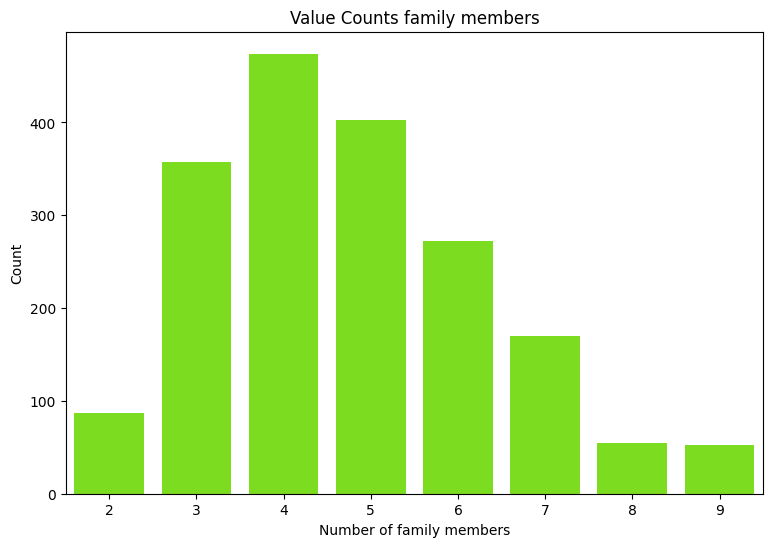

In [153]:
# Get value counts of the 'FamilyMembers' column
family_counts = ins_df['FamilyMembers'].value_counts()

# Create a bar chart for the value counts using Seaborn
plt.figure(figsize=(9, 6))
sns.barplot(x=family_counts.index, y=family_counts.values, color='lawngreen')
plt.xlabel('Number of family members')
plt.ylabel('Count')
plt.title('Value Counts family members')

plt.show()

**After observing, I am sure that the column *FamilyMembers* has no faulty values, therefore this column is already clean**

### Preprocessing: Column "ChronicDiseases"

In [110]:
# See unique
ins_df['ChronicDiseases'].unique()

array([1, 0])

**This column has no faulty values**

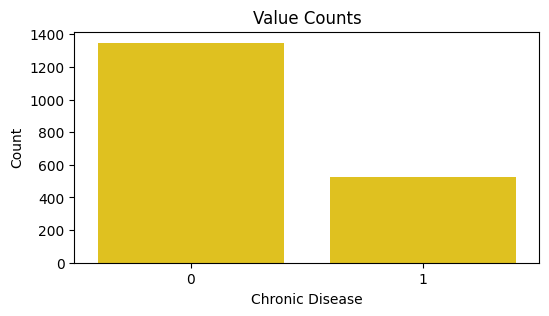

In [152]:
# Get value counts of the 'ChronicDiseases' column
chro_counts = ins_df['ChronicDiseases'].value_counts()

# Create a bar chart for the value counts using Seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x=chro_counts.index, y=chro_counts.values, color='gold')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

### Preprocessing: Column "FrequentFlyer"

In [168]:
# See unique
ins_df['FrequentFlyer'].unique()

array(['No', 'N', 'Y', 'Yes'], dtype=object)

**The data is not stable. "Y" must be changed to "Yes" and same goes with "N"**

In [169]:
# Replace
ins_df['FrequentFlyer'] = ins_df['FrequentFlyer'].replace({"Y": "Yes", "N": "No"})

***FrequentFlyer*** is cleaned

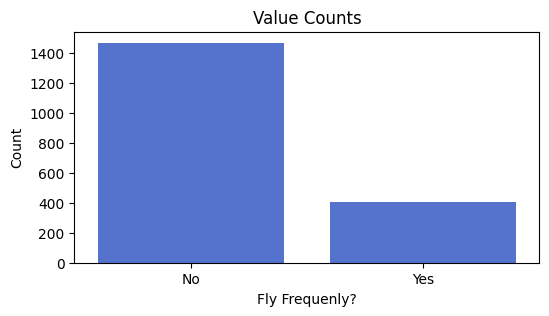

In [170]:
# Get value counts of the 'FrequentFlyer' column
flyer_counts = ins_df['FrequentFlyer'].value_counts()

# Create a bar chart for the value counts using Seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x=flyer_counts.index, y=flyer_counts.values, color='royalblue')
plt.xlabel('Fly Frequenly?')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

### Preprocessing: Column "EverTravelledAbroad"

In [113]:
# See unique
ins_df['EverTravelledAbroad'].unique()

array(['No', 'N', 'Yes', 'Y'], dtype=object)

**The data is not stable. "Y" must be changed to "Yes" and same goes with "N"**

In [114]:
# Replace
ins_df['EverTravelledAbroad'] = ins_df['EverTravelledAbroad'].replace({"Y": "Yes", "N": "No"})

***EverTravelledAbroad*** is cleaned

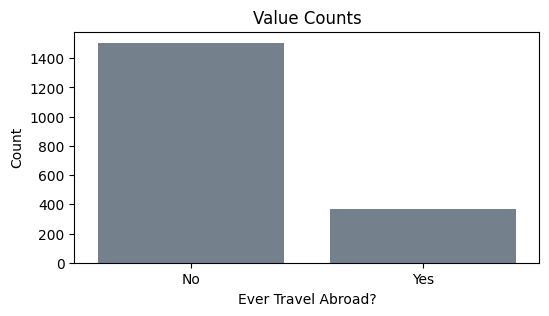

In [151]:
# Get value counts of the 'EverTravelledAbroad' column
ever_counts = ins_df['EverTravelledAbroad'].value_counts()

# Create a bar chart for the value counts using Seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x=ever_counts.index, y=ever_counts.values, color='slategrey')
plt.xlabel('Ever Travel Abroad?')
plt.ylabel('Count')
plt.title('Value Counts')

plt.show()

### Preprocessing: Column "TravelInsurance"

In [117]:
# See unique
ins_df['TravelInsurance'].unique()

array([ 0.,  1., nan])

**Since this is a target column, so any rows contain missing value on this columns mean useless, must be dropped.**

In [120]:
ins_df['TravelInsurance'].isnull().sum()

116

In [129]:
# Delete 116 rows with NULL target
ins_df = ins_df.dropna(subset=['TravelInsurance'])
ins_df = ins_df.reset_index(drop=True)

***TravelInsurance*** is cleaned

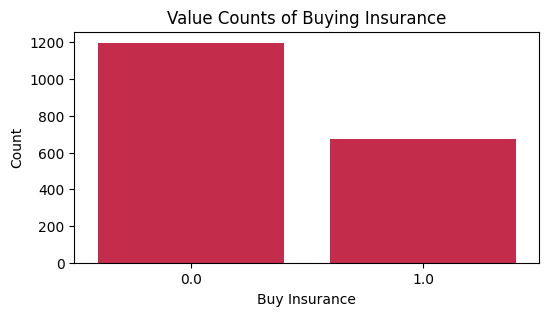

In [150]:
# Get value counts of the 'EverTravelledAbroad' column
ins_counts = ins_df['TravelInsurance'].value_counts()

# Create a bar chart for the value counts using Seaborn
plt.figure(figsize=(6, 3))
sns.barplot(x=ins_counts.index, y=ins_counts.values, color='crimson')
plt.xlabel('Buy Insurance')
plt.ylabel('Count')
plt.title('Value Counts of Buying Insurance')

plt.show()

**After cleaning all columns manually, it's time to move on to the next stage**

### Data Categorical Digitizing

In [134]:
# Cleaned Data, before Digitizing
ins_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000.0,6,1,No,No,0.0
1,31,Private Sector/Self Employed,Yes,1250000.0,7,0,No,No,0.0
2,34,Private Sector/Self Employed,Yes,500000.0,4,1,N,No,1.0
3,28,Private Sector/Self Employed,Yes,700000.0,3,1,No,No,0.0
4,33,Private Sector/Self Employed,Yes,700000.0,8,1,Y,No,0.0
...,...,...,...,...,...,...,...,...,...
1866,33,Private Sector/Self Employed,Yes,1500000.0,4,0,Yes,Yes,1.0
1867,28,Private Sector/Self Employed,Yes,1750000.0,5,1,No,Yes,0.0
1868,28,Private Sector/Self Employed,Yes,1150000.0,6,1,No,No,0.0
1869,34,Private Sector/Self Employed,Yes,1000000.0,6,0,Yes,Yes,1.0


**Columns to encode: "Employment Type", "GraduateOrNot",	"FrequentFlyer",	"EverTravelledAbroad"**

**Columns already encoded: "ChronicDiseases", "TravelInsurance"**

In [171]:
# New categorical dataframe
cins_df = ins_df.copy()

In [172]:
# Digitizing using "Replace"
cins_df['Employment Type'] = cins_df['Employment Type'].replace({"Government Sector": 0, "Private Sector/Self Employed": 1})
cins_df['GraduateOrNot'] = cins_df['GraduateOrNot'].replace({"No": 0, "Yes": 1})
cins_df['FrequentFlyer'] = cins_df['FrequentFlyer'].replace({"No": 0, "Yes": 1})
cins_df['EverTravelledAbroad'] = cins_df['EverTravelledAbroad'].replace({"No": 0, "Yes": 1})

In [173]:
# Change all columns to correct type (to check if validated)
cins_df['Age'] = cins_df['Age'].astype(int)
cins_df['Employment Type'] = cins_df['Employment Type'].astype(int)
cins_df['GraduateOrNot'] = cins_df['GraduateOrNot'].astype(int)
cins_df['AnnualIncome'] = cins_df['AnnualIncome'].astype(int)
cins_df['FamilyMembers'] = cins_df['FamilyMembers'].astype(int)
cins_df['ChronicDiseases'] = cins_df['ChronicDiseases'].astype(int)
cins_df['FrequentFlyer'] = cins_df['FrequentFlyer'].astype(int)
cins_df['EverTravelledAbroad'] = cins_df['EverTravelledAbroad'].astype(int)
cins_df['TravelInsurance'] = cins_df['TravelInsurance'].astype(int)

**Code run successfully, which mean the whole dataset is cleaned and processed**

In [174]:
# Cleaned Data, afer Digitizing
cins_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,33,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1866,33,1,1,1500000,4,0,1,1,1
1867,28,1,1,1750000,5,1,0,1,0
1868,28,1,1,1150000,6,1,0,0,0
1869,34,1,1,1000000,6,0,1,1,1


## **Exploratory Data Analysis (EDA)**

### Histogram of every column for **BOTH** target group (Buy Insurance and Not buy Insurance)

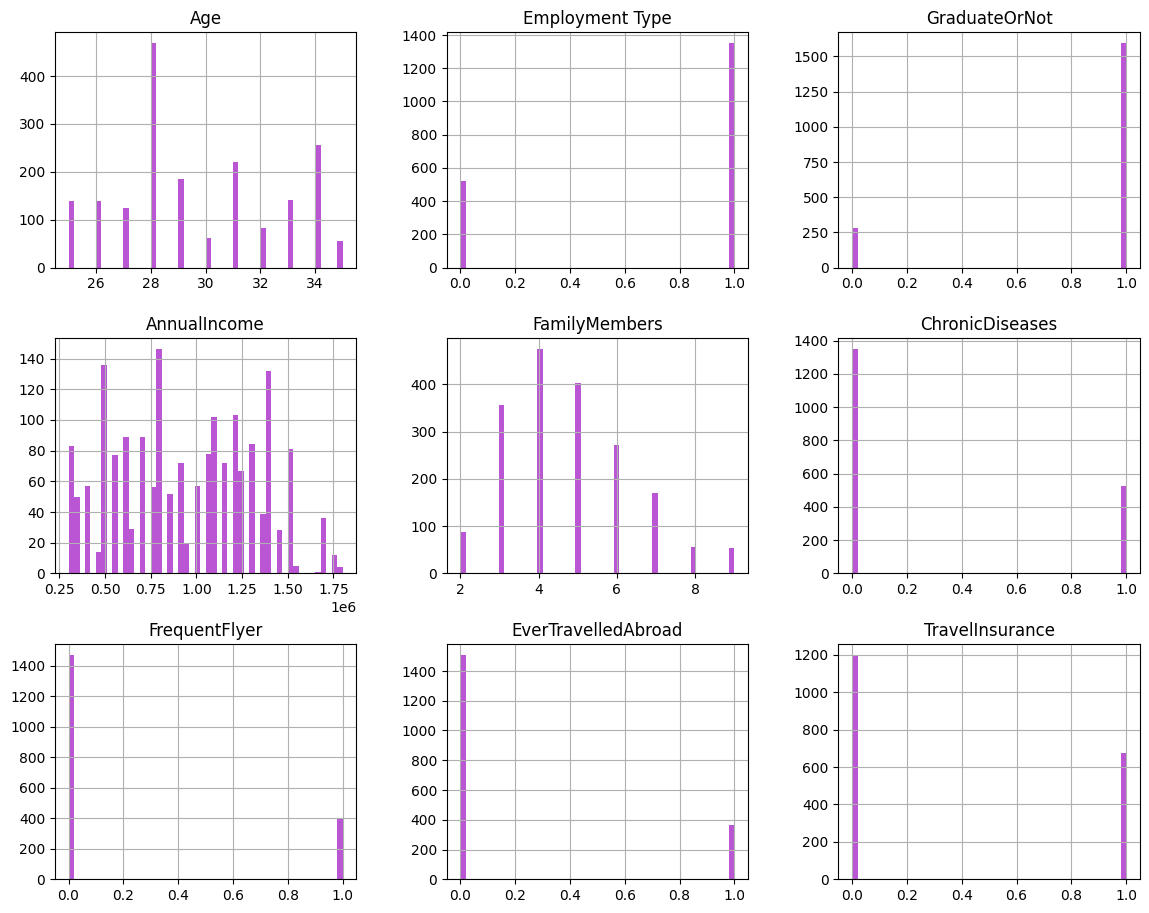

In [175]:
# Distribution of data using Histogram
cins_df.hist(bins=50, figsize=(14,11), color='mediumorchid')
plt.show()

### Histogram of every column for **ONLY** target group (People who bought Travel Insurance)

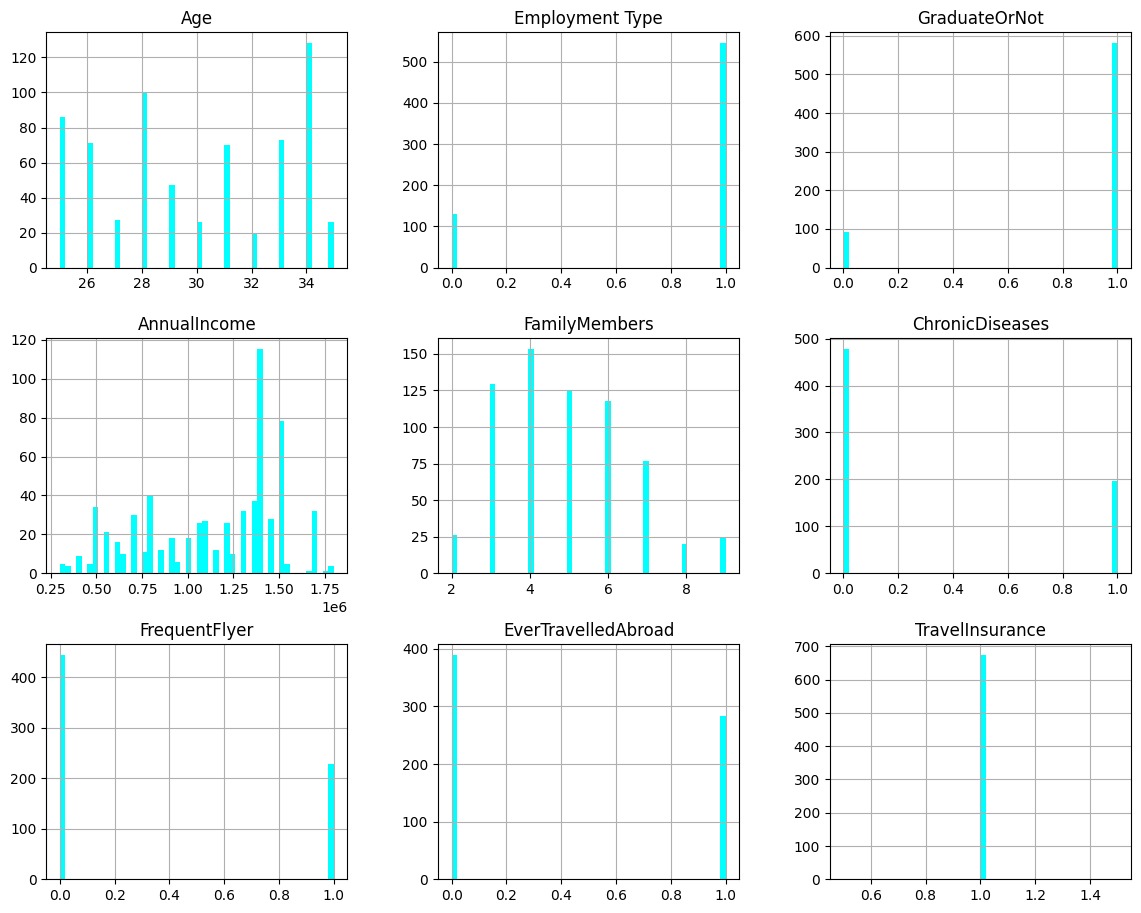

In [176]:
# Only where target = 1
cins_1_df = cins_df[cins_df['TravelInsurance'] == 1]

# Distribution of data using Histogram
cins_1_df.hist(bins=50, figsize=(14,11), color='cyan')
plt.show()

**These generalizations can be made based on the histogram of those who purchased travel insurance:**

  1. The most common age of people who bought the Insurance is **34**.
  2. **"Private Sector/Self Employed"** is the most popular Emplyment type, almost 5 times higher than the other type (**Government Sector**).
  3. Most people who bought Insurance are **Graduated** (~85%).
  4. The people with higher income are more likely to buy the Travel Insurance, we can see the most income group is **1,200,000 to 1,500,000**, but the distribution of income are split balancely on the original histogram for both target group previously.
  5. People who bought the Travel Insurance mostly have from **3 to 6 family members**.
  6. Since the ratio between the first and second histograms in the histogram for **chronic diseases** is almost identical, this column does not significantly influence the aim in a way that we can see.
  7. Since the ratio for **Not Frequenly Flyer / Frequent Flyer** changed sharply from **7/2** to **2/1** between the old and new histogram, we can say that **Frequent Flyer** is more likely to purchase a Travel Insurance.
  8. The column **"Ever Travelled Abroad"** has the same situation with **"Frequent Flyer"**, the ratio for **Traveller / Non-traveller** changed from **4/1** to **4/3** between the old and new histogram.

### Correlation Matrix

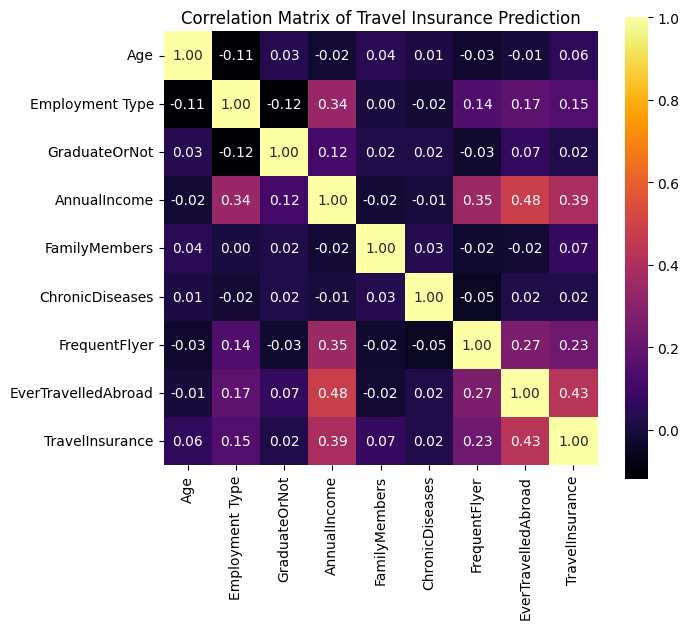

In [177]:
# Create heatmap to visualize
plt.figure(figsize=(7, 6))
# sns.set(font_scale=0.8)         # Font size
sns.heatmap(cins_df.corr(), annot=True, cmap='inferno', fmt=".2f", square=True)

# Display Plot
plt.title("Correlation Matrix of Travel Insurance Prediction")
plt.show()

**These generalizations can be made based on the Correlation Matrix**

  1. The target column **TravelInsurance** has some fairly strong correlation with **Annual Income** and **Ever Travelled Aborad**, while maintain weak connection with all the remaining columns.
  2. **Annual Income** has some noticable connection with **Employment Type, Frequent Flyer** and **Ever Travelled Abroad**.
  3. **Age**, **Number of Family members** and **Chronic Diseases** are the 3 columns that have almost to no correlation with any other columns
  4. The data of this correlation matrix is only for references, because every column is digitized and it affects the correlation scores for the whole set.
  4. All columns will be served in the machine learning model purposes for the target columns.

## **Data Scaling**

In [178]:
# Value counts for target column
target_count = cins_df['TravelInsurance'].value_counts()
target_count

0    1198
1     673
Name: TravelInsurance, dtype: int64

**The data from target column is not balanced, I will scale this so that it can be used for training**

### Experiment 1: Undersampling

In [180]:
# Get the target = 0 and target = 1
cins_1 = cins_df[cins_df['TravelInsurance'] == 1]
cins_0 = cins_df[cins_df['TravelInsurance'] == 0]

In [181]:
# Get 673 random samples of target 0
cins_0_modified = cins_0.sample(673)

In [182]:
# Merge into new dataset
undersampled_cins_df = pd.concat([cins_1, cins_0_modified], axis=0)
undersampled_cins_df.reset_index(drop=True, inplace=True)

In [183]:
# Show new Undersampled Dataset
undersampled_cins_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,34,1,1,500000,4,1,0,0,1
1,31,1,1,800000,3,0,1,1,1
2,28,1,1,1450000,6,1,1,1,1
3,26,1,1,1400000,5,0,1,1,1
4,31,0,1,1500000,6,0,1,1,1
...,...,...,...,...,...,...,...,...,...
1341,28,1,1,800000,3,1,0,0,0
1342,28,1,1,1200000,6,1,0,0,0
1343,32,0,1,350000,6,0,0,0,0
1344,29,1,1,1100000,8,0,0,0,0


**When using Undersampling method, there are only 1346 rows left, which is too few, so I will be using multiple scaling method in parallel to compare the results**

### Experiment 2: Oversampling using SMOTE

In [184]:
# Imbalanced Oversampling >> SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [189]:
# Define target
x = cins_df.drop('TravelInsurance', axis=1)
y = cins_df['TravelInsurance']

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to your data
x_smote, y_smote = smote.fit_resample(x, y)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution before SMOTE: Counter({0: 1198, 1: 673})
Class distribution after SMOTE: Counter({0: 1198, 1: 1198})


##**Machine Learning Prediction Models**

In [333]:
# Import 10 Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tabulate import tabulate

### For Undersampled dataset

In [334]:
# Target variable for x and y (Undesampling)
x_undersampled = undersampled_cins_df.drop('TravelInsurance', axis=1)
y_undersampled = undersampled_cins_df['TravelInsurance']

In [335]:
# Split the train/test set
x_train, x_test, y_train, y_test = train_test_split(x_undersampled, y_undersampled, test_size=0.3, random_state=42)

In [336]:
# Experiment with 10 different machine learning models at once

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Multi-layer Perceptron", MLPClassifier()),
    ("XGBoost", XGBClassifier()),
    ("CatBoost", CatBoostClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

# Initialize an empty DataFrame to store the results
results_undersampled = pd.DataFrame(columns=["Classifier", "Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    accuracy_train = accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results_undersampled = results_undersampled.append({
        "Classifier": name,
        "Balanced Accuracy": auc_score,
        "Training Accuracy": accuracy_train,
        "Testing Accuracy": accuracy_test,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }, ignore_index=True)

# Sort the DataFrame by Balanced Accuracy in descending order
results_undersampled = results_undersampled.sort_values(by="Balanced Accuracy", ascending=False)
results_undersampled = results_undersampled.reset_index(drop=True)

<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_undersampled = results_undersampled.append({
<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_undersampled = results_undersampled.append({
<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_undersampled = results_undersampled.append({
<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_undersampled = results_undersampled.append({
<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will b

Learning rate set to 0.010043
0:	learn: 0.6889206	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6864580	total: 3.88ms	remaining: 1.93s
2:	learn: 0.6830600	total: 4.81ms	remaining: 1.6s
3:	learn: 0.6787560	total: 5.72ms	remaining: 1.42s
4:	learn: 0.6751598	total: 6.83ms	remaining: 1.36s
5:	learn: 0.6718416	total: 7.66ms	remaining: 1.27s
6:	learn: 0.6684473	total: 8.79ms	remaining: 1.25s
7:	learn: 0.6646586	total: 9.78ms	remaining: 1.21s
8:	learn: 0.6606682	total: 10.7ms	remaining: 1.18s
9:	learn: 0.6567831	total: 11.5ms	remaining: 1.14s
10:	learn: 0.6530176	total: 12.4ms	remaining: 1.12s
11:	learn: 0.6493480	total: 13.4ms	remaining: 1.11s
12:	learn: 0.6457946	total: 14.4ms	remaining: 1.1s
13:	learn: 0.6428038	total: 15.3ms	remaining: 1.08s
14:	learn: 0.6397058	total: 16.2ms	remaining: 1.06s
15:	learn: 0.6364864	total: 17ms	remaining: 1.05s
16:	learn: 0.6331801	total: 17.9ms	remaining: 1.03s
17:	learn: 0.6306408	total: 18.7ms	remaining: 1.02s
18:	learn: 0.6280620	total: 19.5ms	remaining: 1.

<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_undersampled = results_undersampled.append({
<ipython-input-336-4f0e0f47569b>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_undersampled = results_undersampled.append({


In [337]:
# Show result ranking table
results_undersampled

,Classifier,Balanced Accuracy,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
0,CatBoost,0.836263,0.850318,0.784653,0.764228,0.865031,0.684466
1,Gradient Boosting,0.822546,0.795117,0.787129,0.754286,0.916667,0.640777
2,Random Forest,0.815129,0.930998,0.767327,0.762626,0.794737,0.733010
3,XGBoost,0.814933,0.912951,0.774752,0.764858,0.817680,0.718447
4,AdaBoost,0.805053,0.763270,0.774752,0.745098,0.880795,0.645631
5,K-Nearest Neighbors,0.801878,0.796178,0.750000,0.737662,0.793296,0.689320
6,Gaussian Naive Bayes,0.761977,0.649682,0.673267,0.670000,0.690722,0.650485
7,Logistic Regression,0.755529,0.495754,0.509901,0.675410,0.509901,1.000000
8,Decision Tree,0.742853,0.930998,0.725248,0.710183,0.768362,0.660194
9,Multi-layer Perceptron,0.500000,0.495754,0.509901,0.675410,0.509901,1.000000


**Based on the Model ranking table, we can see that CatBoost is the best option for prediction with the Accuracy score of 83.62%. Followed by Gradient Boosting, XGBoost and Random Forest.**

**These 4 models will be tested below.**

#### (Undersampled) Model Rank 1: **Catboost**

##### *Prediction*

In [338]:
# Training model
start_cat = time.time()
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')
model.fit(x_train, y_train)

# Make prediction
y_pred_cat = model.predict(x_test)
end_cat = time.time()

0:	learn: 0.6711355	total: 526us	remaining: 52.2ms
1:	learn: 0.6544630	total: 1.5ms	remaining: 73.7ms
2:	learn: 0.6370562	total: 2.25ms	remaining: 72.6ms
3:	learn: 0.6238733	total: 2.96ms	remaining: 71.1ms
4:	learn: 0.6127384	total: 3.66ms	remaining: 69.6ms
5:	learn: 0.6011611	total: 4.33ms	remaining: 67.9ms
6:	learn: 0.5898194	total: 5.06ms	remaining: 67.3ms
7:	learn: 0.5794781	total: 5.74ms	remaining: 66ms
8:	learn: 0.5715572	total: 6.36ms	remaining: 64.3ms
9:	learn: 0.5631325	total: 7.03ms	remaining: 63.3ms
10:	learn: 0.5561977	total: 7.71ms	remaining: 62.4ms
11:	learn: 0.5504935	total: 8.41ms	remaining: 61.7ms
12:	learn: 0.5452470	total: 9.11ms	remaining: 61ms
13:	learn: 0.5413703	total: 9.81ms	remaining: 60.3ms
14:	learn: 0.5378318	total: 10.5ms	remaining: 59.3ms
15:	learn: 0.5328007	total: 11.1ms	remaining: 58.1ms
16:	learn: 0.5275042	total: 11.8ms	remaining: 57.5ms
17:	learn: 0.5234026	total: 12.5ms	remaining: 56.8ms
18:	learn: 0.5202617	total: 13.2ms	remaining: 56.2ms
19:	learn

##### *Classification Report*

In [339]:
# Classification Report
performance_cat = end_cat - start_cat # Calculate the time performance
classification_cat = classification_report(y_test, y_pred_cat, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_cat = classification_report(y_test, y_pred_cat, output_dict=True)

print(classification_cat)
print()
print("Time consumed: ", round(performance_cat, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.72      0.92      0.81       198
    Bought Insurance       0.90      0.65      0.75       206

            accuracy                           0.78       404
           macro avg       0.81      0.79      0.78       404
        weighted avg       0.81      0.78      0.78       404


Time consumed:  0.115 seconds


##### *Confusion Matrix*

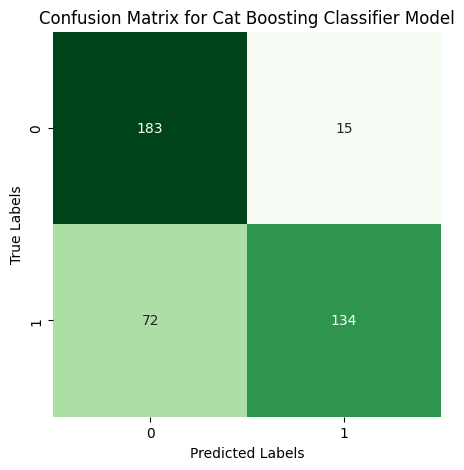


NOT BUYING - 0 / BOUGHT - 1


In [340]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Cat Boosting Classifier Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

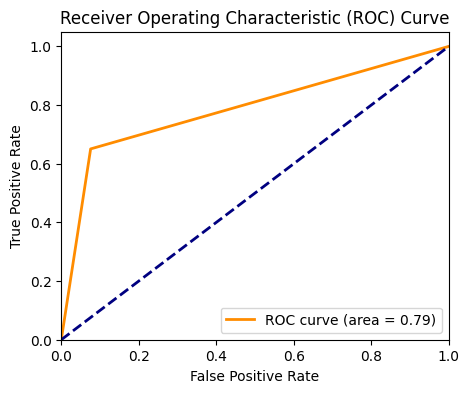

In [341]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (Undersampled) Model Rank 2: **Gradient Boosting**

##### *Prediction*

In [342]:
# Training model
start_grad = time.time()
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)

# Make prediction
y_pred_grad = model.predict(x_test)
end_grad = time.time()

##### *Classification Report*

In [343]:
# Classification Report
performance_grad = end_grad - start_grad # Calculate the time performance
classification_grad = classification_report(y_test, y_pred_grad, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_grad = classification_report(y_test, y_pred_grad, output_dict=True)

print(classification_grad)
print()
print("Time consumed: ", round(performance_grad, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.71      0.94      0.81       198
    Bought Insurance       0.92      0.64      0.75       206

            accuracy                           0.78       404
           macro avg       0.81      0.79      0.78       404
        weighted avg       0.82      0.78      0.78       404


Time consumed:  0.156 seconds


##### *Confusion Matrix*

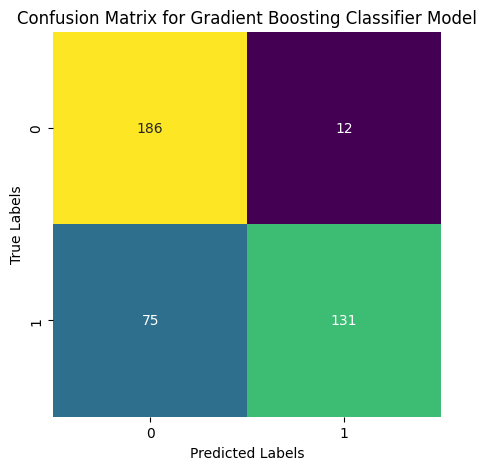


NOT BUYING - 0 / BOUGHT - 1


In [344]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_grad)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting Classifier Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

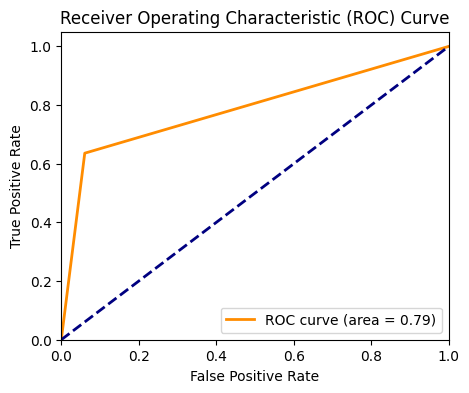

In [345]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grad)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (Undersampled) Model Rank 3: **XGBoost**

##### *Prediction*

In [346]:
# Training model
start_xgb = time.time()
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective='binary:logistic')
model.fit(x_train, y_train)

# Make prediction
y_pred_xgb = model.predict(x_test)
end_xgb = time.time()

##### *Classification Report*

In [347]:
# Classification Report
performance_xgb = end_xgb - start_xgb # Calculate the time performance
classification_xgb = classification_report(y_test, y_pred_xgb, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

print(classification_xgb)
print()
print("Time consumed: ", round(performance_xgb, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.72      0.94      0.81       198
    Bought Insurance       0.92      0.64      0.76       206

            accuracy                           0.79       404
           macro avg       0.82      0.79      0.79       404
        weighted avg       0.82      0.79      0.79       404


Time consumed:  0.053 seconds


##### *Confusion Matrix*

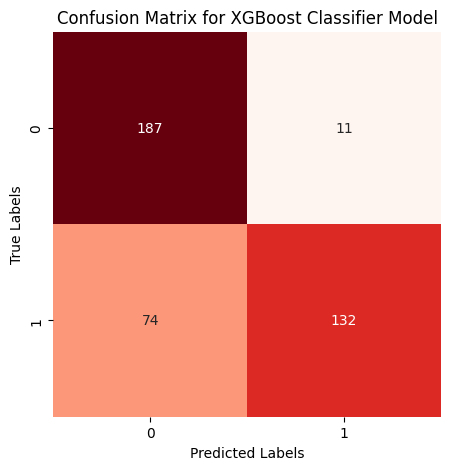


NOT BUYING - 0 / BOUGHT - 1


In [348]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

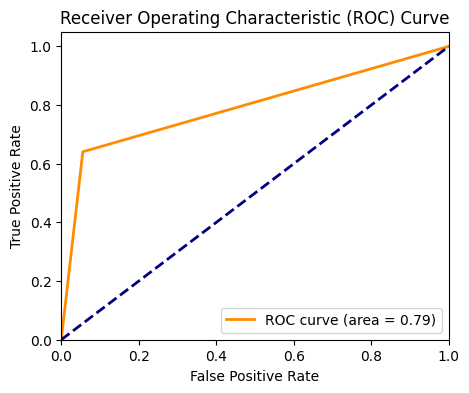

In [349]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (Undersampled) Model Rank 4: **Random Forest**

##### *Prediction*

In [350]:
# Training model
start_forest = time.time()
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(x_train, y_train)

# Make prediction
y_pred_forest = model.predict(x_test)
end_forest = time.time()

##### *Classification Report*

In [351]:
# Classification Report
performance_forest = end_forest - start_forest # Calculate the time performance
classification_forest = classification_report(y_test, y_pred_forest, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_forest = classification_report(y_test, y_pred_forest, output_dict=True)

print(classification_forest)
print()
print("Time consumed: ", round(performance_forest, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.69      0.90      0.78       198
    Bought Insurance       0.86      0.61      0.71       206

            accuracy                           0.75       404
           macro avg       0.77      0.75      0.75       404
        weighted avg       0.78      0.75      0.74       404


Time consumed:  0.335 seconds


##### *Confusion Matrix*

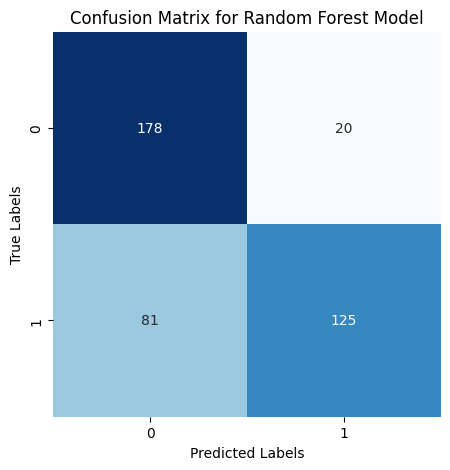


NOT BUYING - 0 / BOUGHT - 1


In [352]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

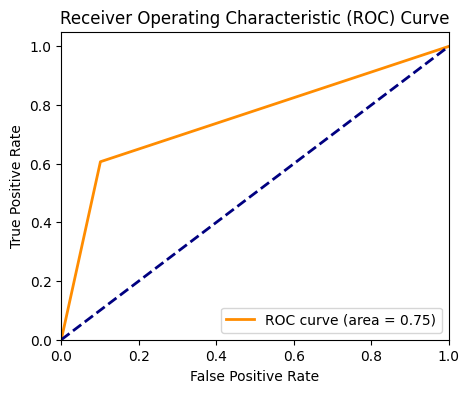

In [353]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### For Oversampled (SMOTE) dataset

In [354]:
# Split the train/test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

In [355]:
# Experiment with 10 different machine learning models at once

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Multi-layer Perceptron", MLPClassifier()),
    ("XGBoost", XGBClassifier()),
    ("CatBoost", CatBoostClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

# Initialize an empty DataFrame to store the results
results_smote = pd.DataFrame(columns=["Classifier", "Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    accuracy_train = accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results_smote = results_smote.append({
        "Classifier": name,
        "Balanced Accuracy": auc_score,
        "Training Accuracy": accuracy_train,
        "Testing Accuracy": accuracy_test,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }, ignore_index=True)

# Sort the DataFrame by Balanced Accuracy in descending order
results_smote = results_smote.sort_values(by="Balanced Accuracy", ascending=False)
results_smote = results_smote.reset_index(drop=True)

<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote = results_smote.append({
<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote = results_smote.append({
<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote = results_smote.append({
<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote = results_smote.append({
<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Learning rate set to 0.012847
0:	learn: 0.6866670	total: 3.66ms	remaining: 3.66s
1:	learn: 0.6827447	total: 6.65ms	remaining: 3.32s
2:	learn: 0.6771837	total: 9.07ms	remaining: 3.01s
3:	learn: 0.6712348	total: 11.8ms	remaining: 2.94s
4:	learn: 0.6657693	total: 13.6ms	remaining: 2.71s
5:	learn: 0.6615265	total: 14.8ms	remaining: 2.46s
6:	learn: 0.6570806	total: 17.3ms	remaining: 2.45s
7:	learn: 0.6526958	total: 18.6ms	remaining: 2.31s
8:	learn: 0.6474136	total: 21.1ms	remaining: 2.32s
9:	learn: 0.6425756	total: 23.5ms	remaining: 2.33s
10:	learn: 0.6375696	total: 26.1ms	remaining: 2.34s
11:	learn: 0.6333498	total: 28.6ms	remaining: 2.35s
12:	learn: 0.6291844	total: 30.9ms	remaining: 2.35s
13:	learn: 0.6256093	total: 33.2ms	remaining: 2.34s
14:	learn: 0.6216395	total: 35.4ms	remaining: 2.33s
15:	learn: 0.6184592	total: 37.8ms	remaining: 2.33s
16:	learn: 0.6138834	total: 40.2ms	remaining: 2.33s
17:	learn: 0.6100066	total: 42.7ms	remaining: 2.33s
18:	learn: 0.6060752	total: 46.7ms	remaining

<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote = results_smote.append({
<ipython-input-355-eda85857c652>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote = results_smote.append({


In [356]:
# Show result ranking table
results_smote

,Classifier,Balanced Accuracy,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
0,XGBoost,0.854013,0.892665,0.764951,0.748137,0.791798,0.709040
1,CatBoost,0.852558,0.852117,0.781641,0.754304,0.845614,0.680791
2,K-Nearest Neighbors,0.846989,0.833631,0.774687,0.763158,0.790909,0.737288
3,Random Forest,0.844915,0.912343,0.770515,0.765957,0.769231,0.762712
4,Gradient Boosting,0.843367,0.796064,0.760779,0.718033,0.855469,0.618644
5,AdaBoost,0.811327,0.756112,0.745480,0.705314,0.820225,0.618644
6,Decision Tree,0.795844,0.912343,0.767733,0.756204,0.782477,0.731638
7,Gaussian Naive Bayes,0.746088,0.652355,0.663421,0.658192,0.658192,0.658192
8,Logistic Regression,0.721260,0.640429,0.657858,0.646552,0.657895,0.635593
9,Multi-layer Perceptron,0.500000,0.496720,0.507650,0.000000,0.000000,0.000000


**The ranking for Prediction Models have changed slightly, the XGBoost classifier method has risen to rank 1 to be the best model, while CatBoost drop to number 2. Also, Random Forest rised to rank 3. Furthermore, K-Nearest Neighbors has joined the top 4, by outranking the Gradient Boosting Model**

**These 4 models will be tested below.**

#### (SMOTE) Model Rank 1: **XGBoost**

##### *Prediction*

In [357]:
# Training model
start_xgb = time.time()
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective='binary:logistic')
model.fit(x_train, y_train)

# Make prediction
y_pred_xgb = model.predict(x_test)
end_xgb = time.time()

##### *Classification Report*

In [358]:
# Classification Report
performance_xgb_2 = end_xgb - start_xgb # Calculate the time performance
classification_xgb_2 = classification_report(y_test, y_pred_xgb, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_xgb_2 = classification_report(y_test, y_pred_xgb, output_dict=True)

print(classification_xgb_2)
print()
print("Time consumed: ", round(performance_xgb_2, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.71      0.93      0.81       365
    Bought Insurance       0.89      0.61      0.72       354

            accuracy                           0.77       719
           macro avg       0.80      0.77      0.77       719
        weighted avg       0.80      0.77      0.77       719


Time consumed:  0.047 seconds


##### *Confusion Matrix*

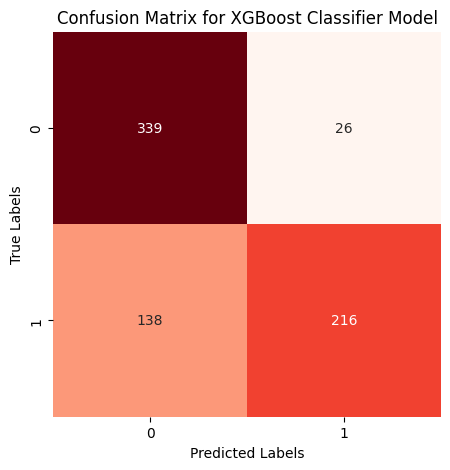


NOT BUYING - 0 / BOUGHT - 1


In [359]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Classifier Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

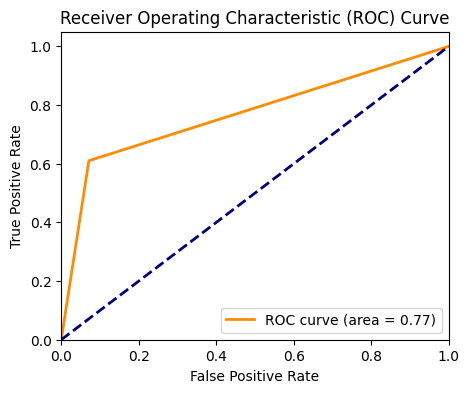

In [360]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (SMOTE) Model Rank 2: **Catboost**

##### *Prediction*

In [361]:
# Training model
start_cat = time.time()
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')
model.fit(x_train, y_train)

# Make prediction
y_pred_cat = model.predict(x_test)
end_cat = time.time()

0:	learn: 0.6667204	total: 600us	remaining: 59.4ms
1:	learn: 0.6437983	total: 1.71ms	remaining: 83.9ms
2:	learn: 0.6251051	total: 2.45ms	remaining: 79.4ms
3:	learn: 0.6077992	total: 3.57ms	remaining: 85.7ms
4:	learn: 0.5940762	total: 4.04ms	remaining: 76.7ms
5:	learn: 0.5815254	total: 4.5ms	remaining: 70.4ms
6:	learn: 0.5687297	total: 4.95ms	remaining: 65.8ms
7:	learn: 0.5578672	total: 5.4ms	remaining: 62.1ms
8:	learn: 0.5491024	total: 5.86ms	remaining: 59.3ms
9:	learn: 0.5404165	total: 6.32ms	remaining: 56.9ms
10:	learn: 0.5342896	total: 6.78ms	remaining: 54.9ms
11:	learn: 0.5282576	total: 7.24ms	remaining: 53.1ms
12:	learn: 0.5230507	total: 7.69ms	remaining: 51.4ms
13:	learn: 0.5187069	total: 8.04ms	remaining: 49.4ms
14:	learn: 0.5142446	total: 8.54ms	remaining: 48.4ms
15:	learn: 0.5102034	total: 8.99ms	remaining: 47.2ms
16:	learn: 0.5060165	total: 9.46ms	remaining: 46.2ms
17:	learn: 0.5016465	total: 9.92ms	remaining: 45.2ms
18:	learn: 0.4989469	total: 10.4ms	remaining: 44.2ms
19:	le

##### *Classification Report*

In [362]:
# Classification Report
performance_cat_2 = end_cat - start_cat # Calculate the time performance
classification_cat_2 = classification_report(y_test, y_pred_cat, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_cat_2 = classification_report(y_test, y_pred_cat, output_dict=True)

print(classification_cat_2)
print()
print("Time consumed: ", round(performance_cat_2, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.71      0.92      0.80       365
    Bought Insurance       0.88      0.62      0.73       354

            accuracy                           0.77       719
           macro avg       0.80      0.77      0.76       719
        weighted avg       0.79      0.77      0.76       719


Time consumed:  0.123 seconds


##### *Confusion Matrix*

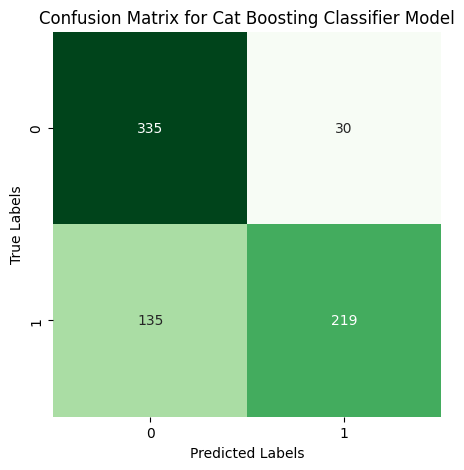


NOT BUYING - 0 / BOUGHT - 1


In [363]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Cat Boosting Classifier Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

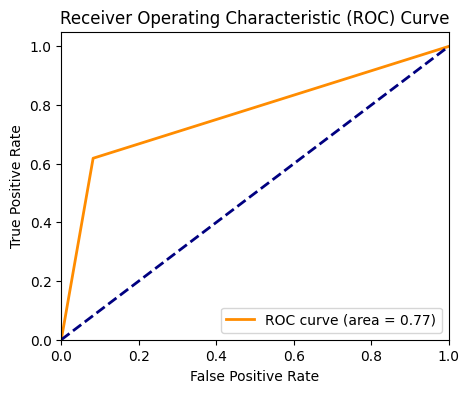

In [364]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (SMOTE) Model Rank 3: **Random Forest**

##### *Prediction*

In [365]:
# Training model
start_forest = time.time()
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(x_train, y_train)

# Make prediction
y_pred_forest = model.predict(x_test)
end_forest = time.time()

##### *Classification Report*

In [366]:
# Classification Report
performance_forest_2 = end_forest - start_forest # Calculate the time performance
classification_forest_2 = classification_report(y_test, y_pred_forest, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_forest_2 = classification_report(y_test, y_pred_forest, output_dict=True)

print(classification_forest_2)
print()
print("Time consumed: ", round(performance_forest_2, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.69      0.93      0.79       365
    Bought Insurance       0.89      0.56      0.69       354

            accuracy                           0.75       719
           macro avg       0.79      0.75      0.74       719
        weighted avg       0.79      0.75      0.74       719


Time consumed:  0.277 seconds


##### *Confusion Matrix*

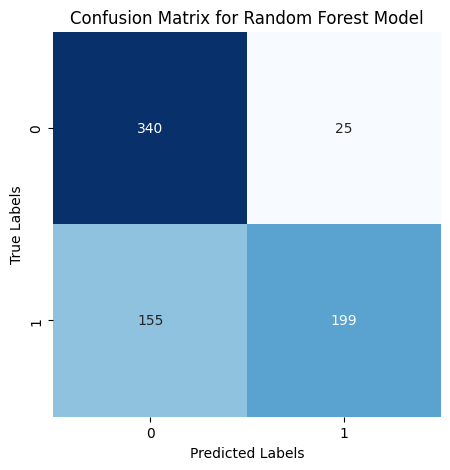


NOT BUYING - 0 / BOUGHT - 1


In [367]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

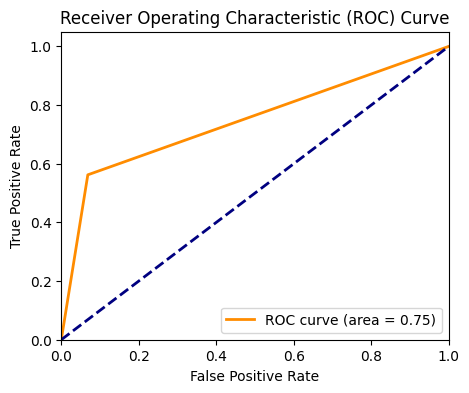

In [368]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### (SMOTE) Model Rank 4: **K-Nearest Neighbours**

##### *Find the best K value*

In [369]:
k_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy_list = []

for i in k_list:
  model_knn_i = KNeighborsClassifier(n_neighbors=i)
  model_knn_i.fit(x_train,y_train)
  y_knn=model_knn_i.predict(x_test)
  classification_knn = classification_report(y_test, y_knn, target_names=["Not Buying", "Bought"])
  report_knn = classification_report(y_test, y_knn, output_dict=True)
  accuracy_knn_i = report_knn['accuracy']
  accuracy_list.append(accuracy_knn_i)

In [370]:
# Turn into a dataframe
k_data = {'K value': k_list, 'Accuracy': accuracy_list}
kdf = pd.DataFrame(k_data)

# Tính độ chuẩn xác là lấy độ chuẩn xác cao nhất
kdf_sorted = kdf.sort_values(by='Accuracy', ascending=False)
kdf_sorted

,K value,Accuracy
1,5,0.774687
2,7,0.773296
4,11,0.773296
6,15,0.770515
3,9,0.764951
7,17,0.764951
8,19,0.764951
9,21,0.762170
5,13,0.759388
0,3,0.757997


**K = 5 is the best value for K-Nearest Neighbours**

##### *Prediction*

In [371]:
# Training model
start_knn = time.time()
model_knn = KNeighborsClassifier(n_neighbors=11)   # lấy n = 11 để được độ chuẩn xác cao nhất
model_knn.fit(x_train,y_train)

# Make prediction
y_pred_knn=model_knn.predict(x_test)
end_knn = time.time()

##### *Classification Report*

In [372]:
# Classification Report
performance_knn_2 = end_knn - start_knn # Calculate the time performance
classification_knn_2 = classification_report(y_test, y_pred_knn, target_names=['Not Buying Insurance', 'Bought Insurance'])
report_knn_2 = classification_report(y_test, y_pred_knn, output_dict=True)

print(classification_knn_2)
print()
print("Time consumed: ", round(performance_knn_2, 3), "seconds")

                      precision    recall  f1-score   support

Not Buying Insurance       0.74      0.86      0.79       365
    Bought Insurance       0.82      0.69      0.75       354

            accuracy                           0.77       719
           macro avg       0.78      0.77      0.77       719
        weighted avg       0.78      0.77      0.77       719


Time consumed:  0.071 seconds


##### *Confusion Matrix*

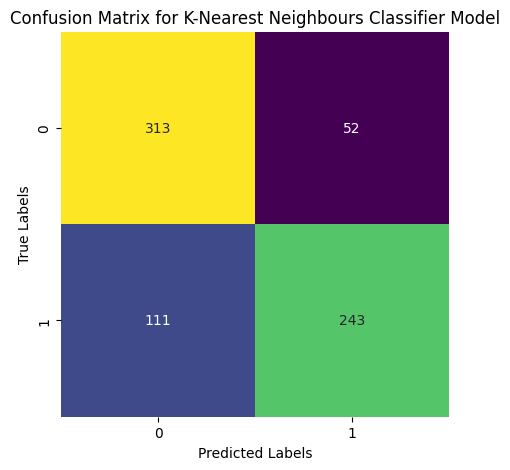


NOT BUYING - 0 / BOUGHT - 1


In [373]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-Nearest Neighbours Classifier Model')
plt.show()

# Show categories
print()
print("NOT BUYING - 0 / BOUGHT - 1")

##### *ROC Curve*

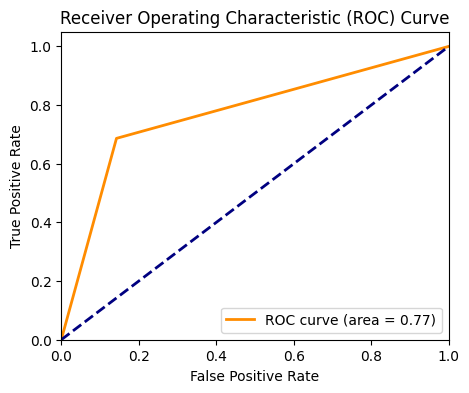

In [374]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **Model Evaluation**

### For Undersampled Dataset

In [383]:
model_header = ['', 'Precision', 'Recall', 'F1-score', 'Accuracy', 'Time Performance']
model_cat_0 = ['CatBoost - Not Buying Insurance', report_cat['0']['precision'], report_cat['0']['recall'], report_cat['0']['f1-score'], report_cat['accuracy'], performance_cat]
model_cat_1 = ['CatBoost - Buying Insurance', report_cat['1']['precision'], report_cat['1']['recall'], report_cat['1']['f1-score'], report_cat['accuracy'], performance_cat]
model_grad_0 = ['Gradient Boosting - Not Buying Insurance', report_grad['0']['precision'], report_grad['0']['recall'], report_grad['0']['f1-score'], report_grad['accuracy'], performance_grad]
model_grad_1 = ['Gradient Boosting - Buying Insurance', report_grad['1']['precision'], report_grad['1']['recall'], report_grad['1']['f1-score'], report_grad['accuracy'], performance_grad]
model_xgb_0 = ['XGBoost - Not Buying Insurance', report_xgb['0']['precision'], report_xgb['0']['recall'], report_xgb['0']['f1-score'], report_xgb['accuracy'], performance_xgb]
model_xgb_1 = ['XGBoost - Buying Insurance', report_xgb['1']['precision'], report_xgb['1']['recall'], report_xgb['1']['f1-score'], report_xgb['accuracy'], performance_xgb]
model_forest_0 = ['Random Forest - Not Buying Insurance', report_forest['0']['precision'], report_forest['0']['recall'], report_forest['0']['f1-score'], report_forest['accuracy'], performance_forest]
model_forest_1 = ['Random Forest - Buying Insurance', report_forest['1']['precision'], report_forest['1']['recall'], report_forest['1']['f1-score'], report_forest['accuracy'], performance_forest]

model_data_undersampled = [model_header, model_cat_0, model_cat_1, model_grad_0, model_grad_1, model_xgb_0, model_xgb_1, model_forest_0, model_forest_1]
model_df_undersampled = pd.DataFrame(model_data_undersampled)
model_df_undersampled.columns = model_df_undersampled .iloc[0]
model_df_undersampled = model_df_undersampled .drop(0)
model_df_undersampled = model_df_undersampled .reset_index(drop=True)

In [384]:
# Show model evaluation model
model_df_undersampled

,,Precision,Recall,F1-score,Accuracy,Time Performance
0,CatBoost - Not Buying Insurance,0.717647,0.924242,0.807947,0.784653,0.114914
1,CatBoost - Buying Insurance,0.899329,0.650485,0.75493,0.784653,0.114914
2,Gradient Boosting - Not Buying Insurance,0.712644,0.939394,0.810458,0.784653,0.155911
3,Gradient Boosting - Buying Insurance,0.916084,0.635922,0.750716,0.784653,0.155911
4,XGBoost - Not Buying Insurance,0.716475,0.944444,0.814815,0.789604,0.05301
5,XGBoost - Buying Insurance,0.923077,0.640777,0.756447,0.789604,0.05301
6,Random Forest - Not Buying Insurance,0.687259,0.89899,0.778993,0.75,0.335186
7,Random Forest - Buying Insurance,0.862069,0.606796,0.712251,0.75,0.335186


In [385]:
# Storing data
stored_undersampled = model_df_undersampled.copy()

# Rounding and adding percentage symbols
model_df_undersampled[['Precision', 'Recall', 'F1-score', 'Accuracy']] = model_df_undersampled[['Precision', 'Recall', 'F1-score', 'Accuracy']].astype(float).round(4)
model_df_undersampled['Time Performance'] = model_df_undersampled['Time Performance'].astype(float).round(2)
model_df_undersampled[['Precision', 'Recall', 'F1-score', 'Accuracy']] = model_df_undersampled[['Precision', 'Recall', 'F1-score', 'Accuracy']].applymap(lambda x: f'{x * 100:.2f}%')

### For Oversampled Dataset

In [386]:
model_header = ['', 'Precision', 'Recall', 'F1-score', 'Accuracy', 'Time Performance']
model_xgb_0 = ['XGBoost - Not Buying Insurance', report_xgb_2['0']['precision'], report_xgb_2['0']['recall'], report_xgb_2['0']['f1-score'], report_xgb_2['accuracy'], performance_xgb_2]
model_xgb_1 = ['XGBoost - Buying Insurance', report_xgb_2['1']['precision'], report_xgb_2['1']['recall'], report_xgb_2['1']['f1-score'], report_xgb_2['accuracy'], performance_xgb_2]
model_cat_0 = ['CatBoost - Not Buying Insurance', report_cat_2['0']['precision'], report_cat_2['0']['recall'], report_cat_2['0']['f1-score'], report_cat_2['accuracy'], performance_cat_2]
model_cat_1 = ['CatBoost - Buying Insurance', report_cat_2['1']['precision'], report_cat_2['1']['recall'], report_cat_2['1']['f1-score'], report_cat_2['accuracy'], performance_cat_2]
model_forest_0 = ['Random Forest - Not Buying Insurance', report_forest_2['0']['precision'], report_forest_2['0']['recall'], report_forest_2['0']['f1-score'], report_forest_2['accuracy'], performance_forest_2]
model_forest_1 = ['Random Forest - Buying Insurance', report_forest_2['1']['precision'], report_forest_2['1']['recall'], report_forest_2['1']['f1-score'], report_forest_2['accuracy'], performance_forest_2]
model_knn_0 = ['K-Nearest Neighbours - Not Buying Insurance', report_knn_2['0']['precision'], report_knn_2['0']['recall'], report_knn_2['0']['f1-score'], report_knn_2['accuracy'], performance_knn_2]
model_knn_1 = ['K-Nearest Neighbours - Buying Insurance', report_knn_2['1']['precision'], report_knn_2['1']['recall'], report_knn_2['1']['f1-score'], report_knn_2['accuracy'], performance_knn_2]

model_data_smote = [model_header, model_xgb_0, model_xgb_1, model_cat_0, model_cat_1, model_forest_0, model_forest_1, model_knn_0, model_knn_1]
model_df_smote = pd.DataFrame(model_data_smote)
model_df_smote.columns = model_df_smote.iloc[0]
model_df_smote = model_df_smote.drop(0)
model_df_smote = model_df_smote.reset_index(drop=True)

In [387]:
# Show model evaluation model
model_df_smote

,,Precision,Recall,F1-score,Accuracy,Time Performance
0,XGBoost - Not Buying Insurance,0.710692,0.928767,0.805226,0.771905,0.046809
1,XGBoost - Buying Insurance,0.892562,0.610169,0.724832,0.771905,0.046809
2,CatBoost - Not Buying Insurance,0.712766,0.917808,0.802395,0.770515,0.122671
3,CatBoost - Buying Insurance,0.879518,0.618644,0.726368,0.770515,0.122671
4,Random Forest - Not Buying Insurance,0.686869,0.931507,0.790698,0.749652,0.276633
5,Random Forest - Buying Insurance,0.888393,0.562147,0.688581,0.749652,0.276633
6,K-Nearest Neighbours - Not Buying Insurance,0.738208,0.857534,0.793409,0.773296,0.070576
7,K-Nearest Neighbours - Buying Insurance,0.823729,0.686441,0.748844,0.773296,0.070576


In [388]:
# Storing data
stored_smote = model_df_smote.copy()

# Rounding and adding percentage symbols
model_df_smote[['Precision', 'Recall', 'F1-score', 'Accuracy']] = model_df_smote[['Precision', 'Recall', 'F1-score', 'Accuracy']].astype(float).round(4)
model_df_smote['Time Performance'] = model_df_smote['Time Performance'].astype(float).round(2)
model_df_smote[['Precision', 'Recall', 'F1-score', 'Accuracy']] = model_df_smote[['Precision', 'Recall', 'F1-score', 'Accuracy']].applymap(lambda x: f'{x * 100:.2f}%')

### **Final Comparison**

In [390]:
# Four best models for Undersampling
model_df_undersampled

,,Precision,Recall,F1-score,Accuracy,Time Performance
0,CatBoost - Not Buying Insurance,71.76%,92.42%,80.79%,78.47%,0.11
1,CatBoost - Buying Insurance,89.93%,65.05%,75.49%,78.47%,0.11
2,Gradient Boosting - Not Buying Insurance,71.26%,93.94%,81.05%,78.47%,0.16
3,Gradient Boosting - Buying Insurance,91.61%,63.59%,75.07%,78.47%,0.16
4,XGBoost - Not Buying Insurance,71.65%,94.44%,81.48%,78.96%,0.05
5,XGBoost - Buying Insurance,92.31%,64.08%,75.64%,78.96%,0.05
6,Random Forest - Not Buying Insurance,68.73%,89.90%,77.90%,75.00%,0.34
7,Random Forest - Buying Insurance,86.21%,60.68%,71.23%,75.00%,0.34


In [391]:
# Four best models for Oversampling using SMOTE
model_df_smote

,,Precision,Recall,F1-score,Accuracy,Time Performance
0,XGBoost - Not Buying Insurance,71.07%,92.88%,80.52%,77.19%,0.05
1,XGBoost - Buying Insurance,89.26%,61.02%,72.48%,77.19%,0.05
2,CatBoost - Not Buying Insurance,71.28%,91.78%,80.24%,77.05%,0.12
3,CatBoost - Buying Insurance,87.95%,61.86%,72.64%,77.05%,0.12
4,Random Forest - Not Buying Insurance,68.69%,93.15%,79.07%,74.97%,0.28
5,Random Forest - Buying Insurance,88.84%,56.21%,68.86%,74.97%,0.28
6,K-Nearest Neighbours - Not Buying Insurance,73.82%,85.75%,79.34%,77.33%,0.07
7,K-Nearest Neighbours - Buying Insurance,82.37%,68.64%,74.88%,77.33%,0.07


### **Final generalizations:**

  1. **CatBoost** and **XGBoost** are the 2 most reliable machine learning classifier models for the general dataset.
  2. **Gradient Boosting**, **Randon Forest** and **K-Nearest Neighbours** are the 3 alternative models for the project.
  3. **XGBoost** has the best time performance (0.05s) and it is recommended when dealing with a bigger dataset.
  3. The difference between **undersampling** method and **oversampling** method for this dataset is not much, so both options are valid.
  4. The **Accuracy score** of models for this project is not the best, but reliable. This might be due to the lack of data (only less than 2000 rows)
